In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fanalysis.ca import CA
import scipy

In [23]:
D = pd.read_excel('dataAFC.xlsx',index_col=0)
print(D)

                Droit  Sciences  Medecine  IUT
CSP_vs_Filiere                                
ExpAgri            80        99        65   58
Patron            168       137       208   62
CadreSup          470       400       876   79
Employe           145       133       135   54
Ouvrier           166       193       127  129


In [24]:
tot_lig = np.sum(D.values,axis=1)
print(tot_lig)
tot_col = np.sum(D.values,axis=0)
print(tot_col)

[ 302  575 1825  467  615]
[1029  962 1411  382]


In [26]:
prof_lig = np.apply_along_axis(arr=D.values, axis=1 ,func1d=lambda x : x/np.sum(x))
print(prof_lig)

[[0.26490066 0.32781457 0.21523179 0.19205298]
 [0.29217391 0.23826087 0.36173913 0.10782609]
 [0.25753425 0.21917808 0.48       0.04328767]
 [0.31049251 0.28479657 0.28907923 0.11563169]
 [0.2699187  0.31382114 0.20650407 0.2097561 ]]


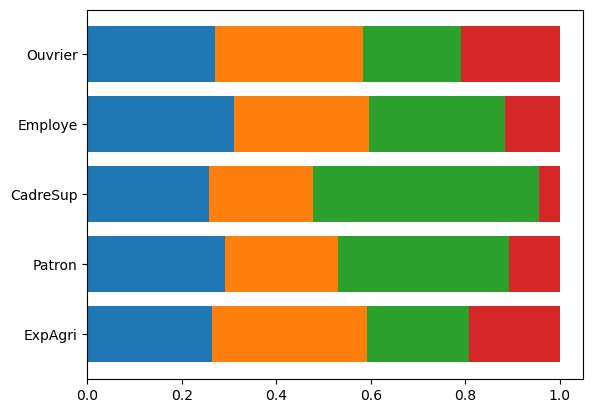

In [27]:
somme = np.zeros(shape=(prof_lig.shape[0]))
for i in range(prof_lig.shape[1]):
  plt.barh(range(prof_lig.shape[0]),prof_lig[:,i],left=somme)
  somme = somme + prof_lig[:,i]

plt.yticks(range(prof_lig.shape[0]),D.index)
plt.show()

In [28]:
prof_marg_lig = tot_col/np.sum(tot_col) #f.j
print(prof_marg_lig)


[0.27193446 0.25422833 0.37288584 0.10095137]


In [29]:
distPairesLig = np.zeros(shape=(prof_lig.shape[0], prof_lig.shape[0]))

# double boucle
for i in range(prof_lig.shape[0] - 1):
    for j in range(prof_lig.shape[0]):
        distPairesLig[i, j] = np.sum((prof_lig[i, :] - prof_lig[j, :]) ** 2 / prof_marg_lig)

# affichage
print(pd.DataFrame(distPairesLig, index=D.index, columns=D.index))

CSP_vs_Filiere   ExpAgri    Patron  CadreSup   Employe   Ouvrier
CSP_vs_Filiere                                                  
ExpAgri         0.000000  0.162117  0.453847  0.087400  0.004172
Patron          0.162117  0.000000  0.084611  0.024514  0.191823
CadreSup        0.453847  0.084611  0.000000  0.176847  0.510901
Employe         0.087400  0.024514  0.176847  0.000000  0.115413
Ouvrier         0.000000  0.000000  0.000000  0.000000  0.000000


In [30]:
distoLig = np.apply_along_axis(arr=prof_lig,axis=1,func1d=lambda x:np.sum((x-prof_marg_lig)**2/prof_marg_lig))
#affichage
print(pd.DataFrame(distoLig,index=D.index))

                       0
CSP_vs_Filiere          
ExpAgri         0.170350
Patron          0.003311
CadreSup        0.069302
Employe         0.030113
Ouvrier         0.205492


In [31]:
poidsLig = tot_lig/np.sum(tot_lig)
inertieLig = distoLig * poidsLig
#affichage
print(pd.DataFrame(np.transpose([distoLig,poidsLig,inertieLig]),columns=['Disto2','Poids','Inertie'] ,index=D.index))
#total inertie
tot_InertieLig = np.sum(inertieLig)
print("\ntot_InertieLig :", tot_InertieLig)


                  Disto2     Poids   Inertie
CSP_vs_Filiere                              
ExpAgri         0.170350  0.079810  0.013596
Patron          0.003311  0.151956  0.000503
CadreSup        0.069302  0.482294  0.033424
Employe         0.030113  0.123414  0.003716
Ouvrier         0.205492  0.162526  0.033398

tot_InertieLig : 0.08463685828547157


In [32]:
afc = CA(row_labels=D.index,col_labels=D.columns)
afc.fit(D.values)
#information restituée sur les facteurs
print(afc.eig_)
print(pd.DataFrame(afc.row_coord_,index=D.index))

[[8.23936026e-02 1.70344867e-03 5.39807038e-04]
 [9.73495522e+01 2.01265584e+00 6.37791913e-01]
 [9.73495522e+01 9.93622081e+01 1.00000000e+02]]
                       0         1         2
CSP_vs_Filiere                              
ExpAgri         0.410115 -0.026253  0.038284
Patron          0.020151  0.026585 -0.046881
CadreSup       -0.262717 -0.015596  0.006199
Employe         0.142090  0.097326  0.021242
Ouvrier         0.451481 -0.039588 -0.009493


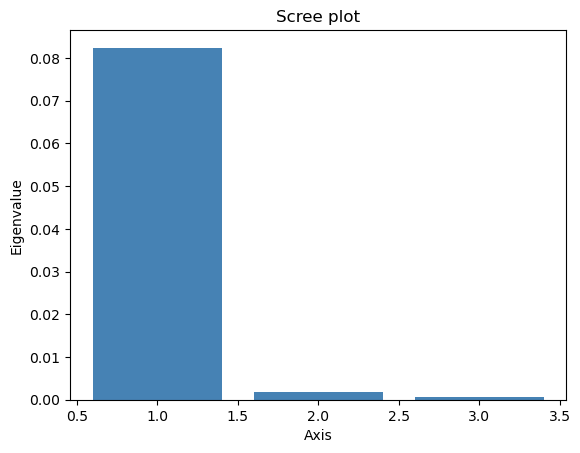

In [33]:
#affichage graphique des v.p.
afc.plot_eigenvalues()

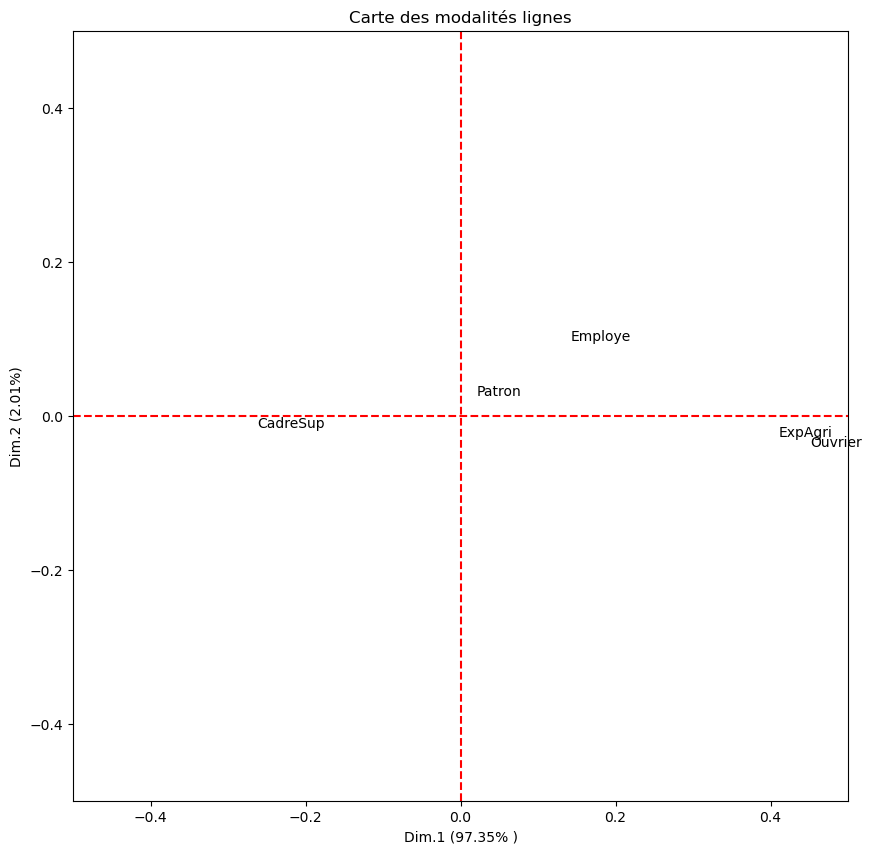

In [34]:
#affichage dans le premier plan factoriel
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.5,+0.5,-0.5,+0.5])
ax.plot([-0.5,+0.5],[0,0],color='red',linestyle='--')
ax.plot([0,0],[-0.5,+0.5],color='red',linestyle='--')
ax.set_xlabel("Dim.1 (97.35% )")
ax.set_ylabel("Dim.2 (2.01%)")
plt.title("Carte des modalités lignes")
for i in range(D.shape[0]):
 ax.text(afc.row_coord_[i,0],afc.row_coord_[i,1],D.index[i])
plt.show()


In [35]:
#tableau des profils colonnes
prof_col = np.apply_along_axis(arr=D.values,axis=0,func1d=lambda x:x/np.sum(x))
print(pd.DataFrame(prof_col,index=D.index,columns=D.columns))

                   Droit  Sciences  Medecine       IUT
CSP_vs_Filiere                                        
ExpAgri         0.077745  0.102911  0.046067  0.151832
Patron          0.163265  0.142412  0.147413  0.162304
CadreSup        0.456754  0.415800  0.620836  0.206806
Employe         0.140914  0.138254  0.095677  0.141361
Ouvrier         0.161322  0.200624  0.090007  0.337696


In [36]:
#profil marginal des filières# fi.
prof_marg_col = tot_lig/np.sum(tot_lig)
print(prof_marg_col)

[0.07980973 0.1519556  0.48229387 0.12341438 0.16252643]


In [37]:
#distance**2 à l'orgine
distoCol = np.apply_along_axis(arr=prof_col,axis=0,func1d=lambda x:np.sum((x
-prof_marg_col)**2/prof_marg_col))
#affichage
print(pd.DataFrame(distoCol,index=D.columns))


                 0
Droit     0.004738
Sciences  0.027168
Medecine  0.092792
IUT       0.414466


In [38]:
#poids de chaque colonne
poidsCol = tot_col/np.sum(tot_col)
print(pd.DataFrame(poidsCol,index=D.columns))
#inertie
inertieCol = distoCol*poidsCol
print("\n",pd.DataFrame(inertieCol,index=D.columns))
#somme des inerties
print("\n",np.sum(inertieCol))
#coordonnées des filières
print("\n",pd.DataFrame(afc.col_coord_,index=D.columns))

                 0
Droit     0.271934
Sciences  0.254228
Medecine  0.372886
IUT       0.100951

                  0
Droit     0.001288
Sciences  0.006907
Medecine  0.034601
IUT       0.041841

 0.08463685828547156

                  0         1         2
Droit     0.027987  0.060669 -0.016545
Sciences  0.160462  0.002734  0.037583
Medecine -0.303125 -0.029662 -0.005200
IUT       0.640174 -0.060749 -0.030870


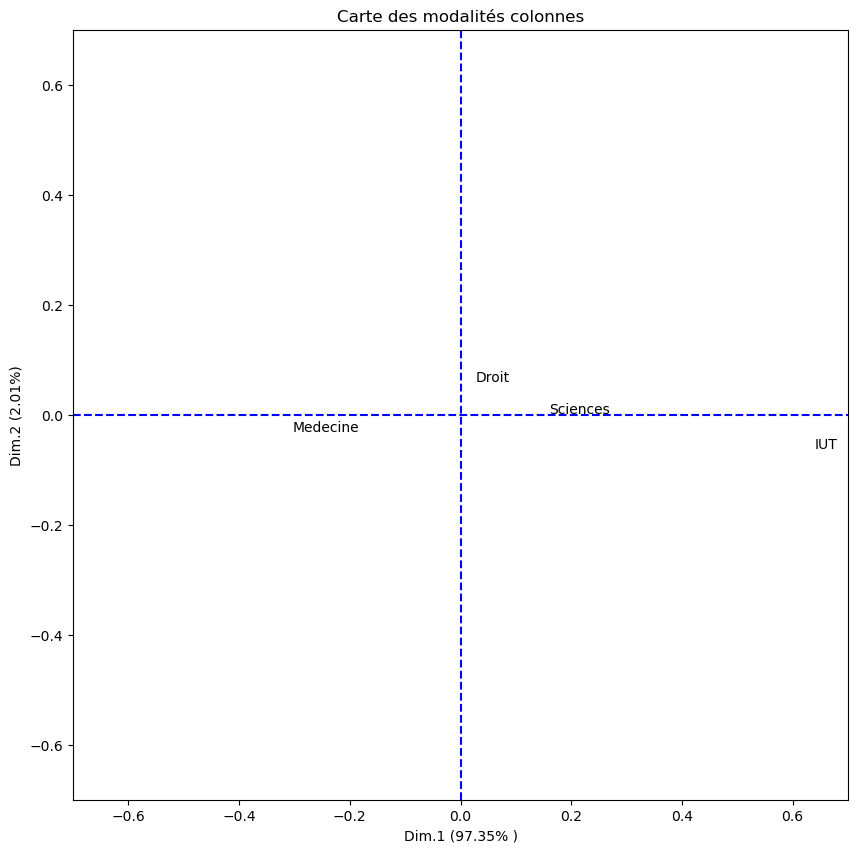

In [39]:
#affichage dans le premier plan factoriel
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.7,+0.7,-0.7,+0.7])
ax.plot([-0.7,+0.7],[0,0],color='blue',linestyle='--')
ax.plot([0,0],[-0.7,+0.7],color='blue',linestyle='--')
ax.set_xlabel("Dim.1 (97.35% )")
ax.set_ylabel("Dim.2 (2.01%)")
plt.title("Carte des modalités colonnes")
for i in range(D.shape[1]):
 ax.text(afc.col_coord_[i,0],afc.col_coord_[i,1],D.columns[i])
plt.show()

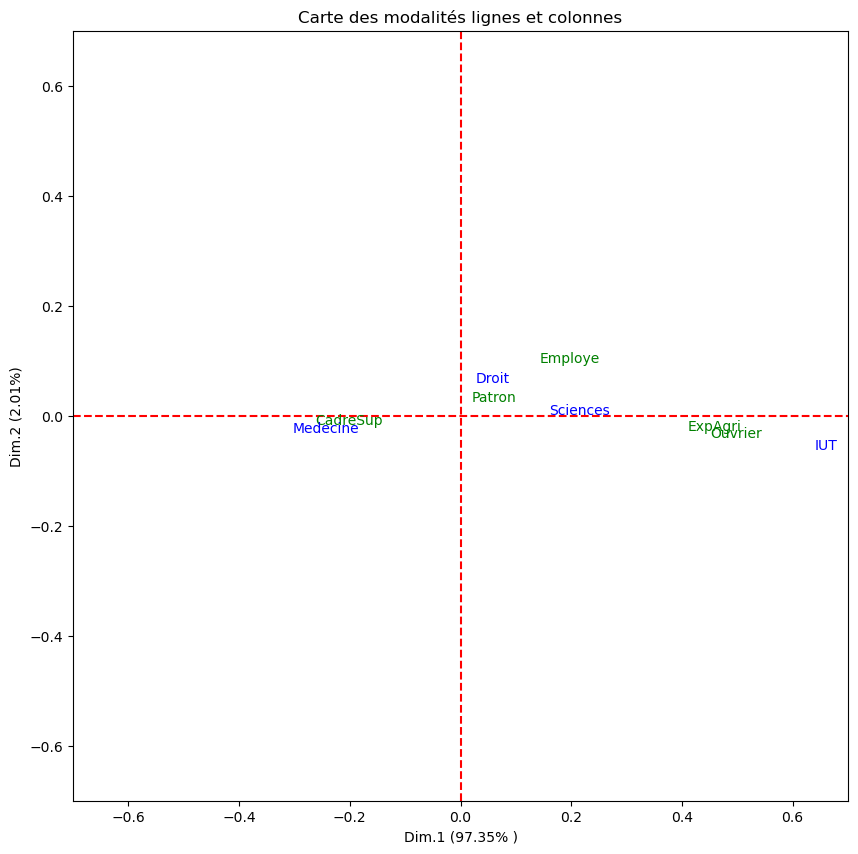

In [40]:
# Représentation simultanée
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis([-0.7, +0.7, -0.7, +0.7])
ax.plot([-0.7, +0.7], [0, 0], color='red', linestyle='--')
ax.plot([0, 0], [-0.7, +0.7], color='red', linestyle='--')
ax.set_xlabel("Dim.1 (97.35% )")
ax.set_ylabel("Dim.2 (2.01%)")
plt.title("Carte des modalités lignes et colonnes")

# Modalités ligne
for i in range(D.shape[0]):
    ax.text(afc.row_coord_[i, 0], afc.row_coord_[i, 1], D.index[i], color='green')
# Modalités colonne
for i in range(D.shape[1]):
    ax.text(afc.col_coord_[i, 0], afc.col_coord_[i, 1], D.columns[i], color='blue')

plt.show()